## トピックモデル with PLSA

In [1]:
import pandas as pd
from connector.mysql import MySQL
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from cython_folder.PLSA.plsa import PLSA

In [2]:
words_1000 = pd.read_csv("./csv/bag_of_words_rev5.csv")
words_1000.head()


,user_id,content,旦那,こと,number,実家,number.1,息子,よう,今日,...,子育て,中心,会話,iPhone,バッテリー,画面,保護,シール,修理,絶縁
0,1703939,生後8ヶ月です なかなかウンチが出ないみたいで 踏ん張っても肛門のとこで止まってしまいます ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1875971,デートの時、行きたい場所ってどうやって決めていますか？ 毎回どこいきたいって？って聞かれるん...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1794051,義実家に帰省中です。義父が息子に離乳食をあげるのが嫌です。始めはあげたさそうな顔でみていたの...,0,2,0,1,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
3,270339,2歳の子供が鼻血を出しました！ すぐ止まったのですが、鼻の中が血だらけで鼻詰まりなのか鼻血が...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1671180,イライラしたらLINEのタイムラインを自分だけ見れるようにしてめちゃくちゃ書きまくってる。 ...,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
N_dv = words_1000.drop(['user_id', 'content'], axis=1).values

In [5]:
# 学習
# k: トピック数, N: BOW行列
plsa = PLSA(K=5, N=N_dv)
# iter: 反復数
plsa.em_estimate(10)

100%|██████████| 100/100 [00:00<00:00, 142.10it/s]


### トピック分布 $\bm{\theta}_d$

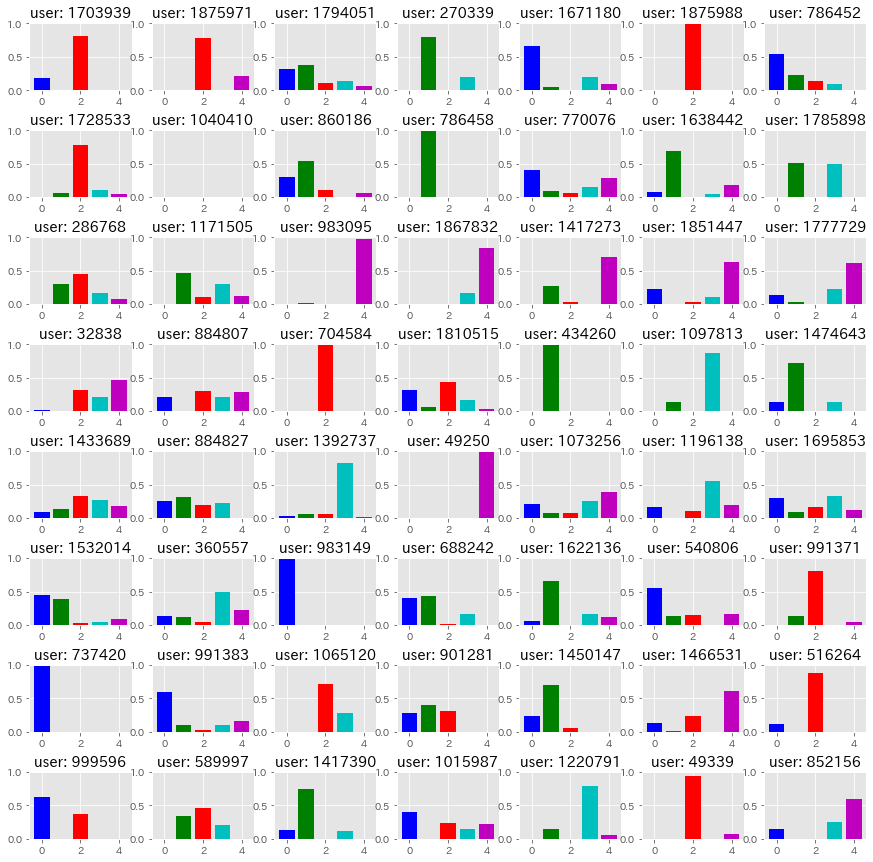

In [5]:
plt.style.use('ggplot')
colors=['b', 'g', 'r', 'c', 'm']
plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace=0.6)

for d in range(56):
    plt.subplot(8, 7, d+1)
    plt.bar(range(5), np.array(plsa.theta_dk[d,:]), color=colors)
    plt.title('user: '+str(words_1000['user_id'].iloc[d]))
    plt.ylim(0.0, 1.0)

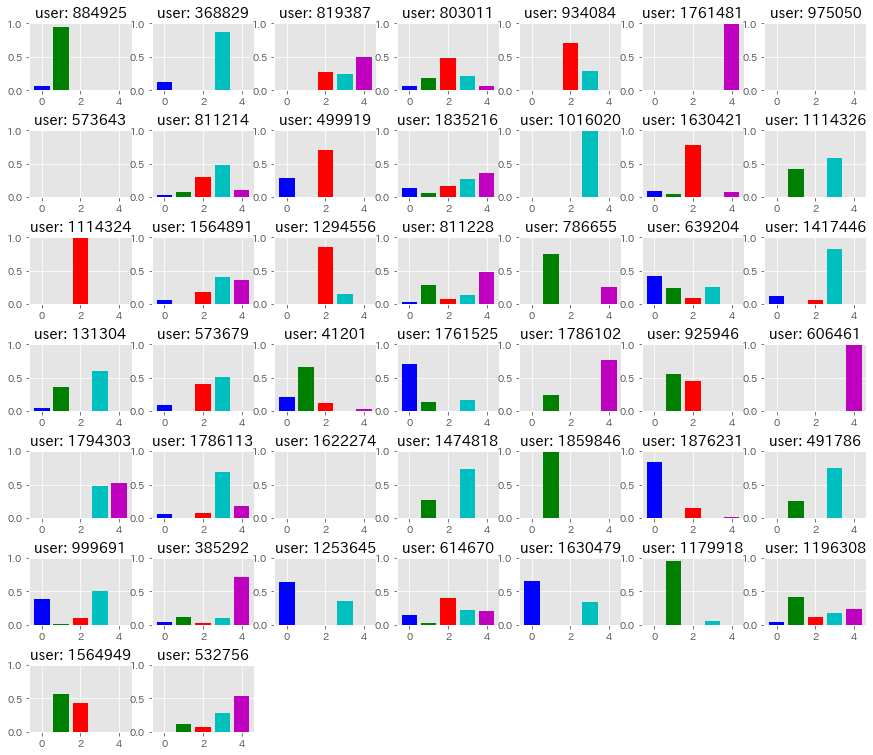

In [6]:
plt.style.use('ggplot')
colors = ['b', 'g', 'r', 'c', 'm']
plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace=0.6)

for d in range(56, plsa.D):
    plt.subplot(8, 7, d-55)
    plt.bar(range(5), np.array(plsa.theta_dk[d, :]), color=colors)
    plt.title('user: '+str(words_1000['user_id'].iloc[d]))
    plt.ylim(0.0, 1.0)

### 単語分布 $\bm{\phi}_k$

/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 9600 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 9995 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 9785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 9726 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 9786 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarn

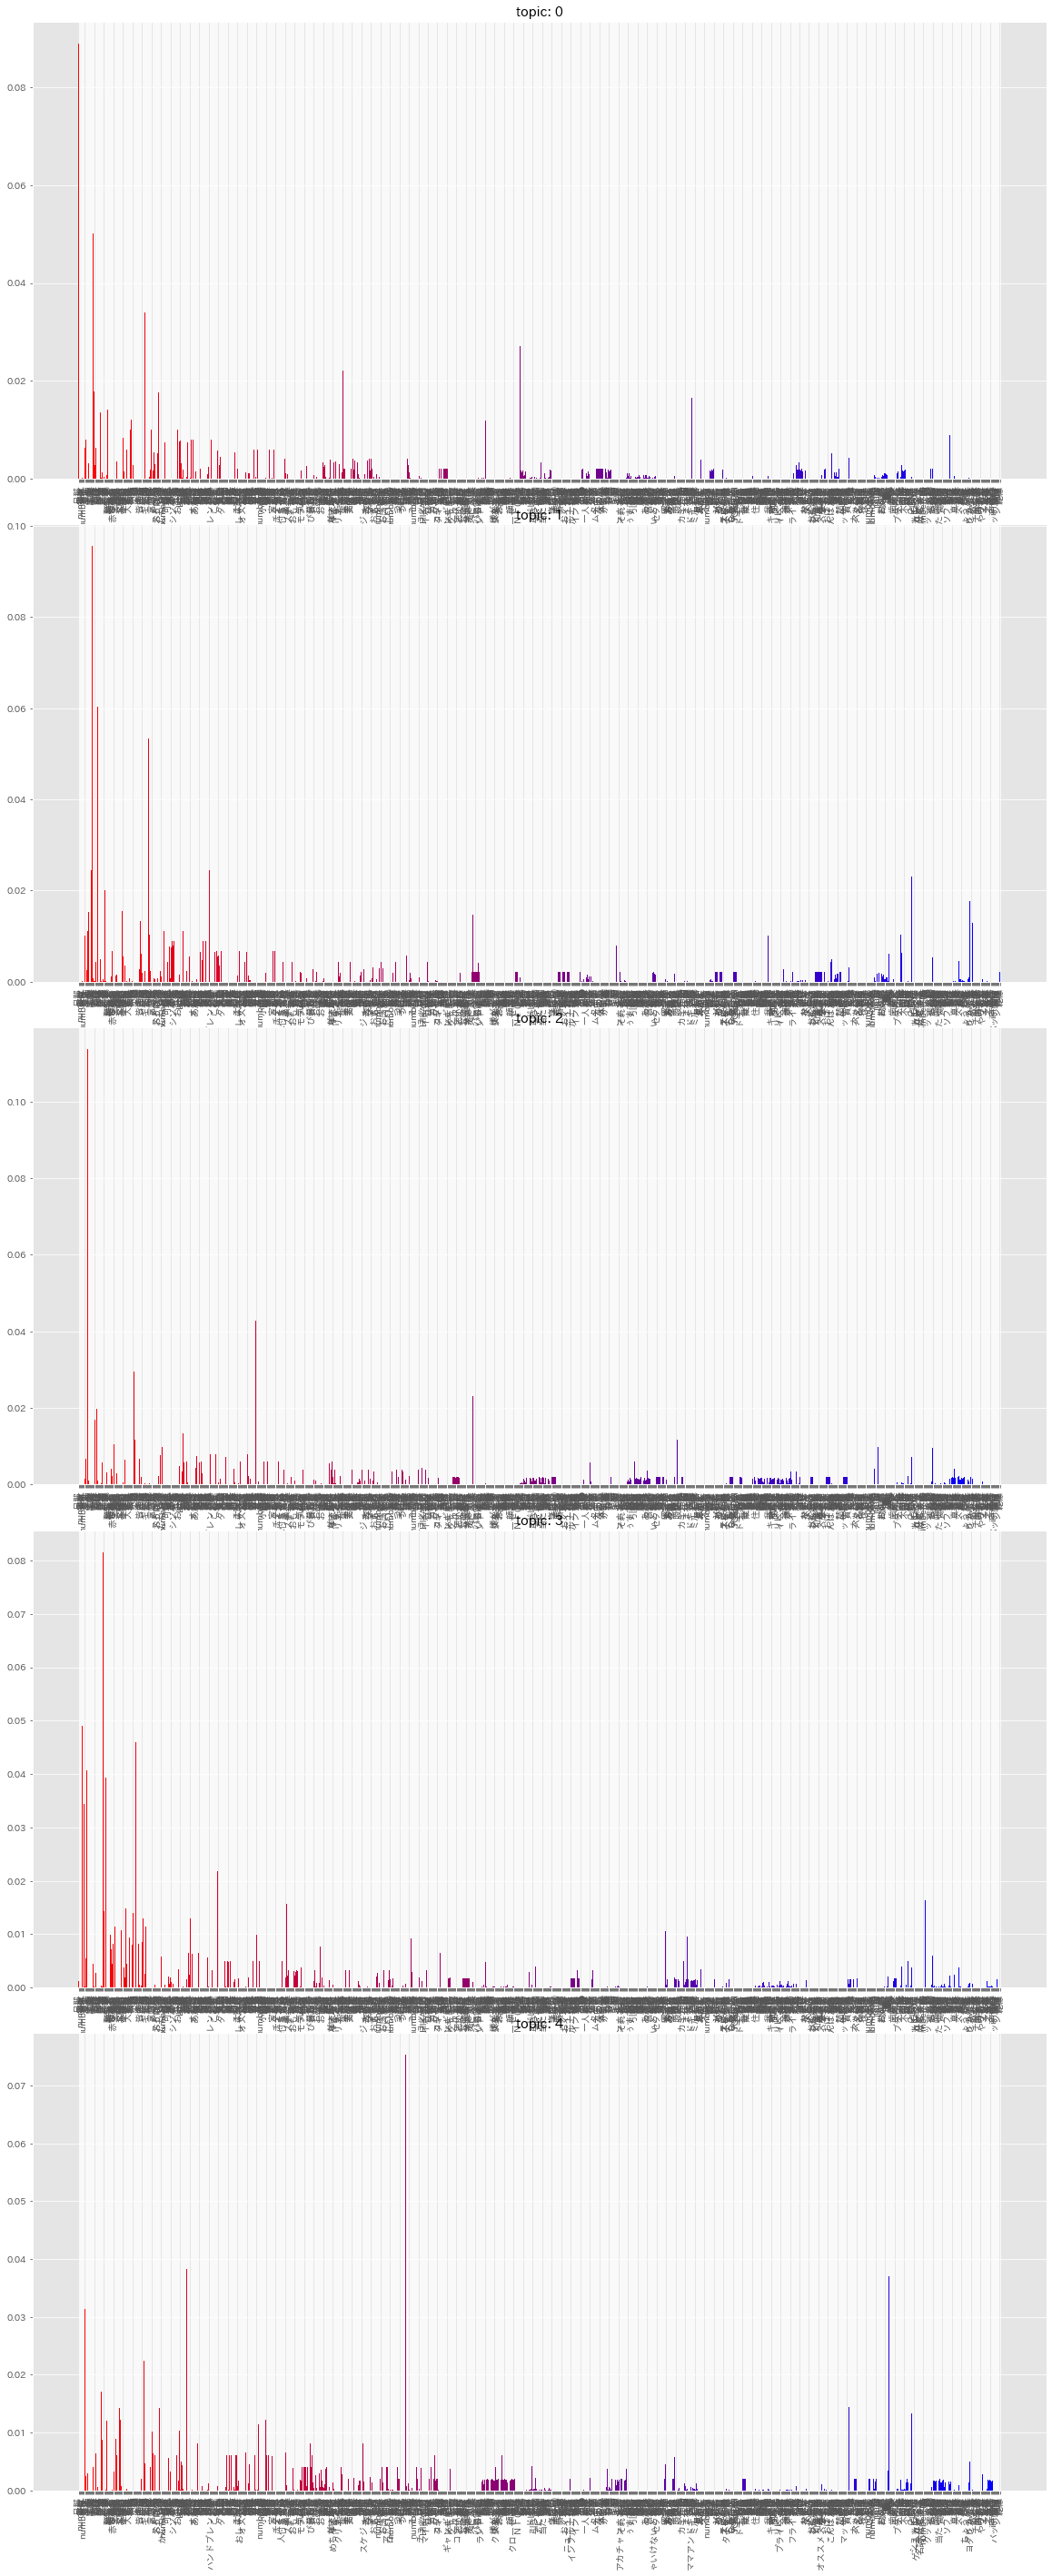

In [7]:
plt.style.use('ggplot')
colors = []
for i in range(plsa.V):
  colors.append((1.0 - i/plsa.V, 0, i/plsa.V))
plt.figure(figsize=(20, 50))
plt.subplots_adjust(hspace=0.1)

for k in range(plsa.K):
    plt.subplot(5, 1, k+1)
    plt.bar(range(plsa.V), np.array(plsa.phi_kv[k, :]), color=colors)
    plt.title('topic: '+str(k))
    #plt.ylim(0.0, 1.0)
    plt.xticks(range(plsa.V), words_1000.columns.to_list()[2:], rotation=90)


Index(['嫁', '入院', '自分', '再', '児', '間', '父', '今', 'こと', '旦那'], dtype='object')
Index(['子供', '子ども', 'イライラ', '再婚', 'らい', '鼻', '義父', '親', '母', '義'], dtype='object')
Index(['暇', 'かん', '夫', '分の', '義母', '両親', '大', '嫌', '話', 'ー'], dtype='object')
Index(['長', '両', '自', 'なん', '息子', '気', '前', '食', '実家', '家'], dtype='object')
Index(['休み', '連絡', 'とも', '予定', 'とこ', '兄', 'よう', '乳', '思い', '実'], dtype='object')


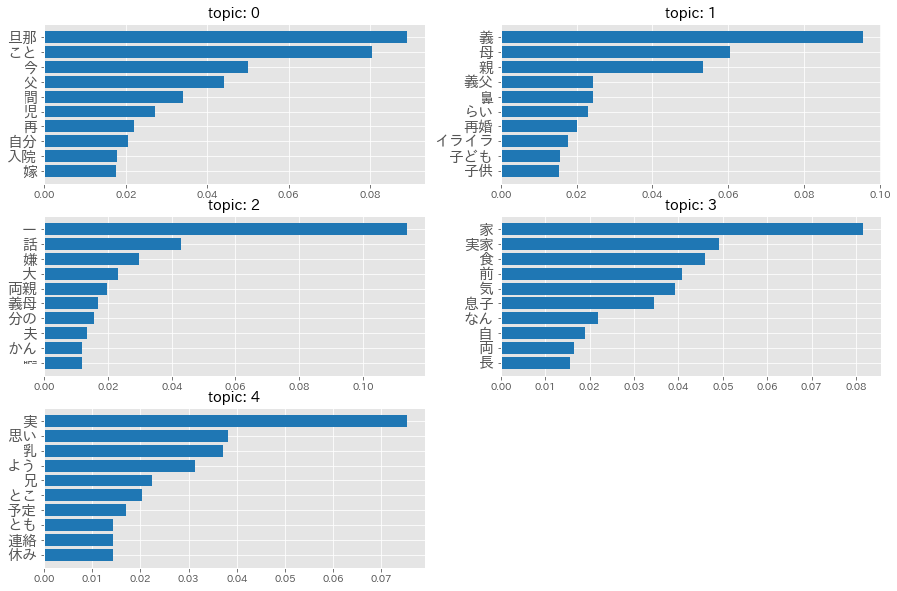

In [9]:
"""各トピック上位単語"""
plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace=0.2)

colums = words_1000.columns[2:]

for k in range(plsa.K):
    plt.subplot(3, 2, k+1)
    sorted_words = np.argsort(np.array(plsa.phi_kv[k, :])) #昇順ソート
    plt.barh(range(10), np.array(plsa.phi_kv[k, :])[sorted_words[-10:]], color='tab:blue')
    plt.title('topic: '+str(k))
    plt.yticks(range(10), colums[sorted_words[-10:]], fontsize=15)
    print(colums[sorted_words[-10:]])
plt.show()

In [111]:
pd.set_option("display.max_colwidth", 1000)

words_1000[words_1000['user_id'] == 983095]['content']


16    新年早々イライラお話聞いて下さい。 旦那の女癖です。 もう無理なのは今日でわかりました。  今まで子供が生まれてから 1番大変な時期に飲み屋の糞女と 不倫していました。 そこで書ききれないくらいの 悲惨な出来事がありました。  それでも再構築をしてきました。 私があと一度チャンスをと言い こうなりました。 その前は旦那は別れてもいいと言い 相手と一緒になるつもりだったらしいです。  そして今日携帯を見たら 出会い系サイトでメールを何人にも送り 会っていたようです。 もう言葉にならないくらいです。 新年早々最悪な気分です。 それが今なんですが、 まだ手が震えています。 とりあえず、メールのやりとり 〇〇で何時に ゴムありでいくらみたいな内容の 写メは証拠で押さえました。  以前の不倫からまだ一年で、 不倫の証拠もあるので慰謝料も 取れると思います。  なんにも懲りてないんだとなんだか 悲しくなりました。 もう一気に冷めたのと、 子供にこんな父親いらないと 本当に思いました。  だれか、お話聞いて下さい。 乱文でごめんなさい。 手が震えて悔しくて。。    
Name: content, dtype: object

In [116]:
words_1000[words_1000['user_id'] == 385292]['content']

92    旦那が休みでいるうちにイオンに行こうか行くまいか… 長女は冬休みで毎日ヒマヒマうるさいし、 次女には、なんか病気がうつりはしないか心配にもなるし… 次女も最近、お出かけがわかるようになってきたから置いて行くのも…だし。 うーん
Name: content, dtype: object